In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### DATA EXPLORATION

In [3]:
df = pd.read_csv("/Users/shubh_rohan/Downloads/Fraud_deploy/Fraudulent-Transaction/Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1280494,135,PAYMENT,5414.49,C1142941278,0.00,0.00,M1434508404,0.00,0.00,0.0,0.0
1280495,135,PAYMENT,15257.53,C2087171711,0.00,0.00,M1141654505,0.00,0.00,0.0,0.0
1280496,135,CASH_OUT,214843.43,C2132434976,286955.00,72111.57,C1255744224,0.00,214843.43,0.0,0.0
1280497,135,CASH_OUT,134807.38,C749363403,72111.57,0.00,C710063170,2221631.34,2356438.72,0.0,0.0


In [4]:
#Shape of the data
df.shape

(1280499, 11)

In [5]:
#Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280499 entries, 0 to 1280498
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1280499 non-null  int64  
 1   type            1280499 non-null  object 
 2   amount          1280499 non-null  float64
 3   nameOrig        1280499 non-null  object 
 4   oldbalanceOrg   1280498 non-null  float64
 5   newbalanceOrig  1280498 non-null  float64
 6   nameDest        1280498 non-null  object 
 7   oldbalanceDest  1280498 non-null  float64
 8   newbalanceDest  1280498 non-null  float64
 9   isFraud         1280498 non-null  float64
 10  isFlaggedFraud  1280498 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 107.5+ MB


In [6]:
#Description of data
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.280499e+06,1.280499e+06,1.280498e+06,1.280498e+06,1.280498e+06,1.280498e+06,1.280498e+06,1280498.0
mean,4.555897e+01,1.629530e+05,8.753618e+05,8.958151e+05,9.861776e+05,1.118442e+06,1.204219e-03,0.0
std,4.212963e+01,2.734228e+05,2.974531e+06,3.010888e+06,2.305078e+06,2.417105e+06,3.468097e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.600000e+01,1.282232e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,3.500000e+01,7.842198e+04,1.554500e+04,0.000000e+00,1.294892e+05,2.232652e+05,0.000000e+00,0.0
75%,4.400000e+01,2.184391e+05,1.304279e+05,1.710595e+05,9.289908e+05,1.157453e+06,0.000000e+00,0.0
max,1.350000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.220740e+07,4.220740e+07,1.000000e+00,0.0


### EXPLORATORY DATA ANALYSIS (EDA)

In [7]:
#Checking for Null values
print('Null Values:',df.isnull().values.any())

Null Values: True


#### Distribution of the Transaction Type column

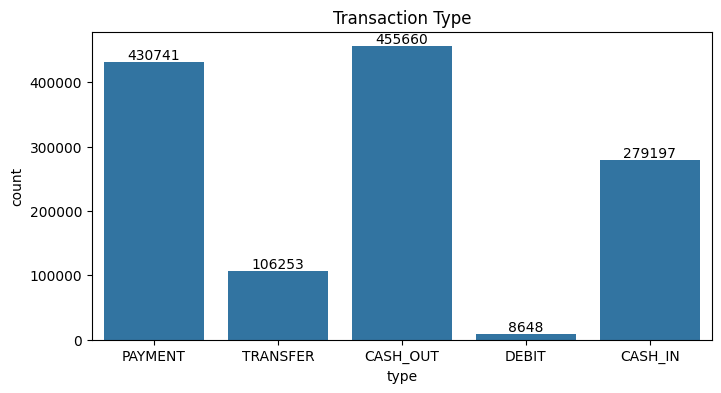

In [8]:
#Visualization
fig, ax=plt.subplots(1,1, figsize=(8,4))
sns.countplot(x=df.type).set_title("Transaction Type")
ax.bar_label(ax.containers[0])
plt.show()

#### Pie chart to visualize the percentage distribution of each class

Text(0.5, 1.0, 'Percentage distribution of each transaction type')

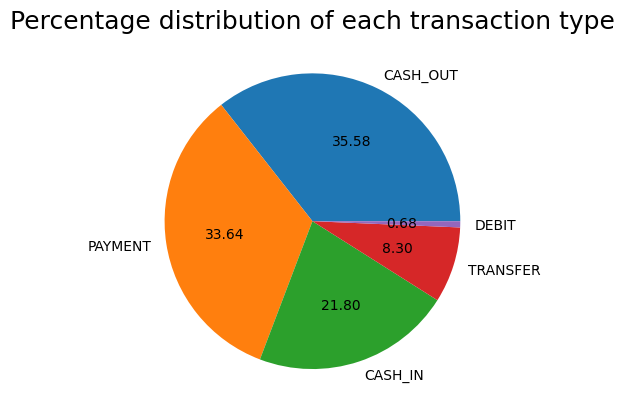

In [9]:
plt.pie(df['type'].value_counts(), labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'], autopct='%.2f')
plt.title('Percentage distribution of each transaction type', fontsize=18)

#### Fraud Dataset And Valid Dataset

In [10]:
#Fraud and non-Fraud Distribution
fraud = df[df['isFraud']==1]
valid = df[df['isFraud']==0]
print("Fraud:",fraud.shape)
print("Valid:",valid.shape)

Fraud: (1542, 11)
Valid: (1278956, 11)


#### Relation between the Fraud Transaction and the Transactions Flagged by the system

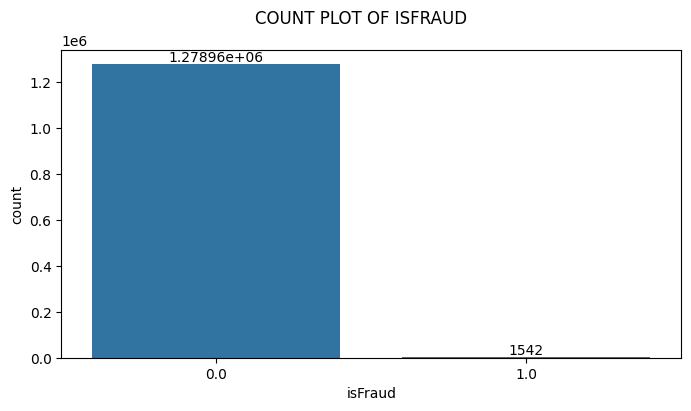

In [11]:
# chart for label class
plt.figure(figsize=(8,4))
ax = sns.countplot(data=df, x='isFraud')
ax.bar_label(ax.containers[0])

plt.suptitle('COUNT PLOT OF ISFRAUD')
plt.show()

#### Fraud Transactions and Transaction types

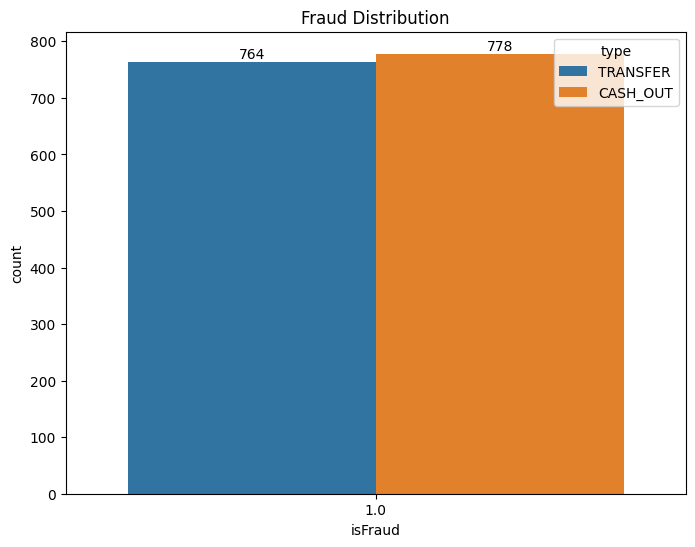

In [12]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x = 'isFraud',hue = 'type', data=fraud)
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title('Fraud Distribution')
plt.show()

#### Dealing with Account Ids 'nameOrig' and 'nameDest'

We do not get any beneficial information from the nameOrig or nameDest, so we'll be dropping these columns.

#### Feature Engineering and Data Cleaning

As We know Dataset is totally Biased, 8231 are fraud transactions(minority class) where as remainings are non fraud transactions(majority class). However We are trying to make content small so that we could balanced the dataset. Hence we are going to take 12000 data from each type(Payment,Transfer,Cash_out,Debit,Cash_in) which is non fraud and will make one dataframe of fraud data i.e 8231 and we will combine all the dataframe to perform further steps.

In [13]:
fraud = df[df['isFraud']==1]
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1.0,0.0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1.0,0.0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1.0,0.0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1262331,134,CASH_OUT,1525742.02,C566299980,1525742.02,0.0,C2132741249,0.00,1525742.02,1.0,0.0
1268132,135,TRANSFER,60646.82,C16325193,60646.82,0.0,C1142308678,0.00,0.00,1.0,0.0
1268133,135,CASH_OUT,60646.82,C1591547495,60646.82,0.0,C1132157369,43264.78,103911.60,1.0,0.0
1279179,135,TRANSFER,515645.16,C885687058,515645.16,0.0,C1873143762,0.00,0.00,1.0,0.0


In [14]:
transfer = df[(df['type']=='TRANSFER') & (df['isFraud']==0)]
transfer1=transfer.head(12000)
transfer1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
19,1,TRANSFER,215310.30,C1670993182,705.00,0.00,C1100439041,22425.00,0.00,0.0,0.0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.00,2719172.89,0.0,0.0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.20,C1937962514,517.00,8383.29,0.0,0.0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.00,C1330106945,57901.66,24044.18,0.0,0.0
79,1,TRANSFER,77957.68,C207471778,0.00,0.00,C1761291320,94900.00,22233.65,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
142949,11,TRANSFER,689978.77,C1207589610,166088.00,0.00,C1005856130,10870.00,700848.77,0.0,0.0
142964,11,TRANSFER,216388.35,C942594959,462358.00,245969.65,C778384023,0.00,216388.35,0.0,0.0
142966,11,TRANSFER,2130918.93,C188286369,745503.96,0.00,C2018751567,0.00,2130918.93,0.0,0.0
142997,11,TRANSFER,2023924.17,C1540907040,545456.09,0.00,C173961721,2178730.76,4202654.93,0.0,0.0


In [15]:
payment = df[(df['type']=='PAYMENT') & (df['isFraud']==0)]
payment1=payment.head(12000)
payment1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.0,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
24108,8,PAYMENT,13802.70,C1653572480,56710.00,42907.30,M2087721404,0.0,0.0,0.0,0.0
24110,8,PAYMENT,1942.96,C1427144523,274.00,0.00,M1260221930,0.0,0.0,0.0,0.0
24112,8,PAYMENT,6402.51,C1299972350,99926.00,93523.49,M465622077,0.0,0.0,0.0,0.0
24113,8,PAYMENT,11738.52,C1003638922,17829.85,6091.33,M1830688100,0.0,0.0,0.0,0.0


In [16]:
cash_out = df[(df['type']=='CASH_OUT') & (df['isFraud']==0)]
cash_out1 = cash_out.head(12000)
cash_out1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0.0,0.0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.00,2415.16,0.0,0.0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.00,64106.18,0.0,0.0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.00,6453430.91,0.0,0.0
51,1,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
45560,9,CASH_OUT,398135.92,C1956662442,0.00,0.0,C1423983240,549002.09,947138.01,0.0,0.0
45561,9,CASH_OUT,173296.72,C1399983549,11961.00,0.0,C685786661,150393.07,323689.79,0.0,0.0
45562,9,CASH_OUT,134749.83,C735655415,0.00,0.0,C1102319340,10388343.43,10523093.26,0.0,0.0
45564,9,CASH_OUT,260556.81,C1533020913,4846.00,0.0,C397672119,0.00,260556.81,0.0,0.0


In [17]:
debit = df[(df['type']=='DEBIT') & (df['isFraud']==0)]
debit1 = debit.head(12000)
debit1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.00,40348.79,0.0,0.0
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.00,157982.12,0.0,0.0
21,1,DEBIT,9302.79,C1566511282,11299.0,1996.21,C1973538135,29832.00,16896.70,0.0,0.0
22,1,DEBIT,1065.41,C1959239586,1817.0,751.59,C515132998,10330.00,0.00,0.0,0.0
41,1,DEBIT,5758.59,C1466917878,32604.0,26845.41,C1297685781,209699.00,16997.22,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1280028,135,DEBIT,3883.13,C883508240,480.0,0.00,C804729149,315765.52,319648.65,0.0,0.0
1280086,135,DEBIT,5274.24,C1027455316,43181.0,37906.76,C866524632,142998.56,148272.80,0.0,0.0
1280138,135,DEBIT,2921.90,C1736749767,24702.0,21780.10,C1124603994,1207475.81,1210397.71,0.0,0.0
1280177,135,DEBIT,712.54,C26383539,32708.0,31995.46,C232670006,1880315.26,1881027.80,0.0,0.0


In [18]:
cash_in = df[(df['type']=='CASH_IN') & (df['isFraud']==0)]
cash_in1 = cash_in.head(12000)
cash_in1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
389,1,CASH_IN,143236.26,C1862994526,0.00,143236.26,C1688019098,608932.17,97263.78,0.0,0.0
390,1,CASH_IN,228451.89,C1614133563,143236.26,371688.15,C2083562754,719678.38,1186556.81,0.0,0.0
391,1,CASH_IN,35902.49,C839771540,371688.15,407590.65,C2001112025,49003.30,0.00,0.0,0.0
392,1,CASH_IN,232953.64,C1037163664,407590.65,640544.28,C33524623,1172672.27,1517262.16,0.0,0.0
393,1,CASH_IN,65912.95,C180316302,640544.28,706457.23,C1330106945,104198.26,24044.18,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
63673,9,CASH_IN,60925.49,C569900309,8611069.67,8671995.16,C456930332,145527.37,18246.61,0.0,0.0
63674,9,CASH_IN,46388.49,C697840884,8671995.16,8718383.65,C352211689,81999.93,35611.44,0.0,0.0
63675,9,CASH_IN,122487.44,C258282341,8718383.65,8840871.10,C1910963690,204940.81,0.00,0.0,0.0
63676,9,CASH_IN,327979.11,C248222613,8840871.10,9168850.21,C459857341,329646.12,320251.43,0.0,0.0


In [19]:
data = pd.concat([transfer1,payment1,cash_out1,debit1,cash_in1,fraud], axis=0)
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0.0,0.0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0.0,0.0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0.0,0.0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0.0,0.0
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1262331,134,CASH_OUT,1525742.02,C566299980,1525742.02,0.0,C2132741249,0.00,1525742.02,1.0,0.0
1268132,135,TRANSFER,60646.82,C16325193,60646.82,0.0,C1142308678,0.00,0.00,1.0,0.0
1268133,135,CASH_OUT,60646.82,C1591547495,60646.82,0.0,C1132157369,43264.78,103911.60,1.0,0.0
1279179,135,TRANSFER,515645.16,C885687058,515645.16,0.0,C1873143762,0.00,0.00,1.0,0.0


In [20]:
#We do not get any beneficial information from the nameOrig or nameDest. Hence, we'll be dropping these columns.
data1 = data.drop(['nameOrig','nameDest'],axis=1)
data1

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0.0,0.0
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0.0,0.0
58,1,TRANSFER,62610.80,79114.00,16503.2,517.00,8383.29,0.0,0.0
78,1,TRANSFER,42712.39,10363.39,0.0,57901.66,24044.18,0.0,0.0
79,1,TRANSFER,77957.68,0.00,0.0,94900.00,22233.65,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1262331,134,CASH_OUT,1525742.02,1525742.02,0.0,0.00,1525742.02,1.0,0.0
1268132,135,TRANSFER,60646.82,60646.82,0.0,0.00,0.00,1.0,0.0
1268133,135,CASH_OUT,60646.82,60646.82,0.0,43264.78,103911.60,1.0,0.0
1279179,135,TRANSFER,515645.16,515645.16,0.0,0.00,0.00,1.0,0.0


#### Taking note of the balances before and after transactions

##### As most of the transactions has errors in showing the account balances before and after transaction, we calculate the error

In [21]:
zero_balance = list(data.loc[(data1.oldbalanceOrg == 0) & (data1.newbalanceOrig == 0) & (data1.amount != 0)].type.values)

print('Number of transcation where oldbalanceorig & newbalanceorig is zero but amount of transaction is not zero :{}'.format(len(zero_balance)))


Number of transcation where oldbalanceorig & newbalanceorig is zero but amount of transaction is not zero :16640


In [22]:
print('number of recipients who have newbalanceDest and oldbalanceDest is zero :{}'
      .format(len(data1.loc[(data1.newbalanceDest == 0) & (data1.oldbalanceDest == 0) ].values)))

number of recipients who have newbalanceDest and oldbalanceDest is zero :13497


#### Taking note of the balances before and after transactions

##### As most of the transactions has errors in showing the account balances before and after transaction, we calculate the error

In [23]:
data1['origin_bal_change'] = data1['oldbalanceOrg'] - data1['newbalanceOrig']
data1['dest_bal_increase'] = data1['newbalanceDest'] - data1['oldbalanceDest']
data1

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origin_bal_change,dest_bal_increase
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0.0,0.0,705.00,-22425.00
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0.0,0.0,10835.00,2712905.89
58,1,TRANSFER,62610.80,79114.00,16503.2,517.00,8383.29,0.0,0.0,62610.80,7866.29
78,1,TRANSFER,42712.39,10363.39,0.0,57901.66,24044.18,0.0,0.0,10363.39,-33857.48
79,1,TRANSFER,77957.68,0.00,0.0,94900.00,22233.65,0.0,0.0,0.00,-72666.35
...,...,...,...,...,...,...,...,...,...,...,...
1262331,134,CASH_OUT,1525742.02,1525742.02,0.0,0.00,1525742.02,1.0,0.0,1525742.02,1525742.02
1268132,135,TRANSFER,60646.82,60646.82,0.0,0.00,0.00,1.0,0.0,60646.82,0.00
1268133,135,CASH_OUT,60646.82,60646.82,0.0,43264.78,103911.60,1.0,0.0,60646.82,60646.82
1279179,135,TRANSFER,515645.16,515645.16,0.0,0.00,0.00,1.0,0.0,515645.16,0.00


#### Converting the step feature from hours into days

In [24]:
num_days = 7
num_hours = 2
fraud_days = fraud.step % num_days
fraud_hours = fraud.step % num_hours
valid_days = valid.step % num_days
valid_hours = valid.step % num_hours

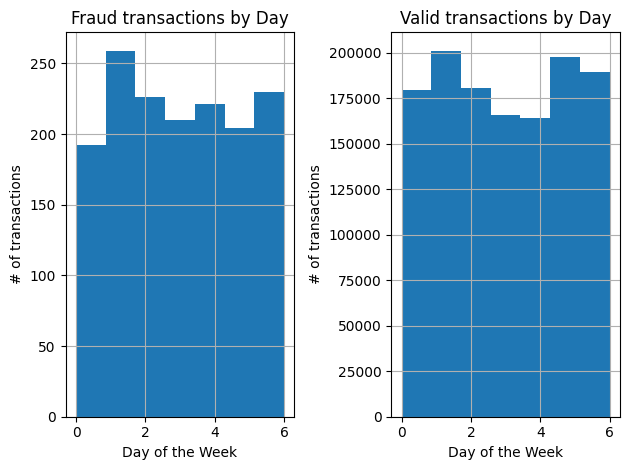

In [25]:
# plotting scatterplot of the days of the week,
plt.subplot(1, 2, 1)
fraud_days.hist(bins=num_days)
plt.title('Fraud transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.subplot(1,2,2)
valid_days.hist(bins=num_days)
plt.title('Valid transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

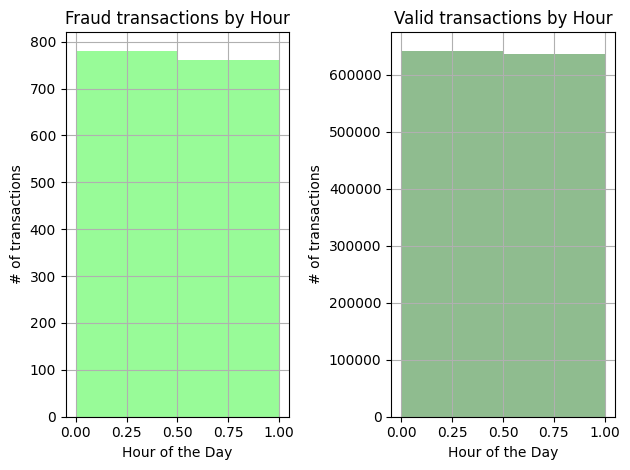

In [26]:
# plotting scatterplot of the hours of days, identifying the fraudulent transactions (red) from the valid transactions (green)
plt.subplot(1, 2, 1)
fraud_hours.hist(bins=num_hours, color="palegreen")
plt.title('Fraud transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")


plt.subplot(1, 2, 2)
valid_hours.hist(bins=num_hours, color="darkseagreen")
plt.title('Valid transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

##### INFERENCE:

From the graphs above, there is strong evidence to suggest that from hour 0 to hour 9, valid transactions very rarely occur. On the other hand, fraudulent transactions still occur at similar rates to any hour of the day outside of hours 0 to 9.

So I will add a new feature hour_of_day which is just the [(step column) %24]

In [27]:
data1['HourOfDay'] = np.nan # initializing feature column
data1.HourOfDay = data1['step'].apply(lambda i: i/24)
data1

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origin_bal_change,dest_bal_increase,HourOfDay
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0.0,0.0,705.00,-22425.00,0.041667
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0.0,0.0,10835.00,2712905.89,0.041667
58,1,TRANSFER,62610.80,79114.00,16503.2,517.00,8383.29,0.0,0.0,62610.80,7866.29,0.041667
78,1,TRANSFER,42712.39,10363.39,0.0,57901.66,24044.18,0.0,0.0,10363.39,-33857.48,0.041667
79,1,TRANSFER,77957.68,0.00,0.0,94900.00,22233.65,0.0,0.0,0.00,-72666.35,0.041667
...,...,...,...,...,...,...,...,...,...,...,...,...
1262331,134,CASH_OUT,1525742.02,1525742.02,0.0,0.00,1525742.02,1.0,0.0,1525742.02,1525742.02,5.583333
1268132,135,TRANSFER,60646.82,60646.82,0.0,0.00,0.00,1.0,0.0,60646.82,0.00,5.625000
1268133,135,CASH_OUT,60646.82,60646.82,0.0,43264.78,103911.60,1.0,0.0,60646.82,60646.82,5.625000
1279179,135,TRANSFER,515645.16,515645.16,0.0,0.00,0.00,1.0,0.0,515645.16,0.00,5.625000


#### DATA PREPARATION

##### We apply Label_encoding to convert string datatype into float datatype

In [28]:
#Converting string datatypes into float datatypes
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data1['type'] = label_encoder.fit_transform(data1['type'])
data1

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origin_bal_change,dest_bal_increase,HourOfDay
19,1,4,215310.30,705.00,0.0,22425.00,0.00,0.0,0.0,705.00,-22425.00,0.041667
24,1,4,311685.89,10835.00,0.0,6267.00,2719172.89,0.0,0.0,10835.00,2712905.89,0.041667
58,1,4,62610.80,79114.00,16503.2,517.00,8383.29,0.0,0.0,62610.80,7866.29,0.041667
78,1,4,42712.39,10363.39,0.0,57901.66,24044.18,0.0,0.0,10363.39,-33857.48,0.041667
79,1,4,77957.68,0.00,0.0,94900.00,22233.65,0.0,0.0,0.00,-72666.35,0.041667
...,...,...,...,...,...,...,...,...,...,...,...,...
1262331,134,1,1525742.02,1525742.02,0.0,0.00,1525742.02,1.0,0.0,1525742.02,1525742.02,5.583333
1268132,135,4,60646.82,60646.82,0.0,0.00,0.00,1.0,0.0,60646.82,0.00,5.625000
1268133,135,1,60646.82,60646.82,0.0,43264.78,103911.60,1.0,0.0,60646.82,60646.82,5.625000
1279179,135,4,515645.16,515645.16,0.0,0.00,0.00,1.0,0.0,515645.16,0.00,5.625000


<Axes: >

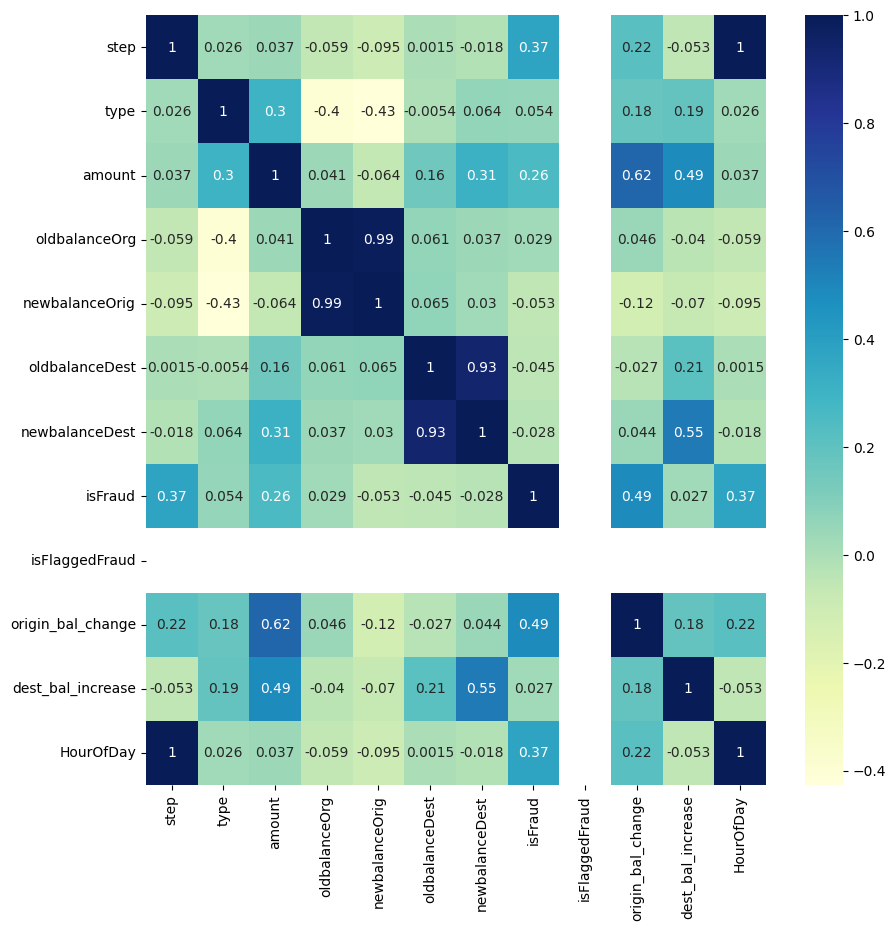

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
sns.heatmap(data1[top_corr_features].corr(),annot=True,cmap="YlGnBu")

In [30]:
data1.type.value_counts()

type
1    12778
4    12764
3    12000
0    12000
2     8648
Name: count, dtype: int64

In [31]:
#Importing Packages
from random import seed, sample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
X = data1.drop(["isFraud","step"], axis=1)
Y = data1.isFraud

In [33]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,origin_bal_change,dest_bal_increase,HourOfDay
19,4,215310.30,705.00,0.0,22425.00,0.00,0.0,705.00,-22425.00,0.041667
24,4,311685.89,10835.00,0.0,6267.00,2719172.89,0.0,10835.00,2712905.89,0.041667
58,4,62610.80,79114.00,16503.2,517.00,8383.29,0.0,62610.80,7866.29,0.041667
78,4,42712.39,10363.39,0.0,57901.66,24044.18,0.0,10363.39,-33857.48,0.041667
79,4,77957.68,0.00,0.0,94900.00,22233.65,0.0,0.00,-72666.35,0.041667
...,...,...,...,...,...,...,...,...,...,...
1262331,1,1525742.02,1525742.02,0.0,0.00,1525742.02,0.0,1525742.02,1525742.02,5.583333
1268132,4,60646.82,60646.82,0.0,0.00,0.00,0.0,60646.82,0.00,5.625000
1268133,1,60646.82,60646.82,0.0,43264.78,103911.60,0.0,60646.82,60646.82,5.625000
1279179,4,515645.16,515645.16,0.0,0.00,0.00,0.0,515645.16,0.00,5.625000


In [34]:
Y

19         0.0
24         0.0
58         0.0
78         0.0
79         0.0
          ... 
1262331    1.0
1268132    1.0
1268133    1.0
1279179    1.0
1279180    1.0
Name: isFraud, Length: 58190, dtype: float64

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [36]:
#Normalizing data so that all variables follow the same scale (0 to 1)
scaler = StandardScaler()

#Fit only to the training data
scaler.fit(x_train)

#Now apply the transformations to the data:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [37]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [38]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (46552, 10)
Shape of x_test: (11638, 10)
Shape of y_train: (46552,)
Shape of y_test: (11638,)


<Axes: title={'center': 'COUNT OF FRAUDULENT VS NON-FRAUDULENT TRANSACTIONS'}, xlabel='isFraud'>

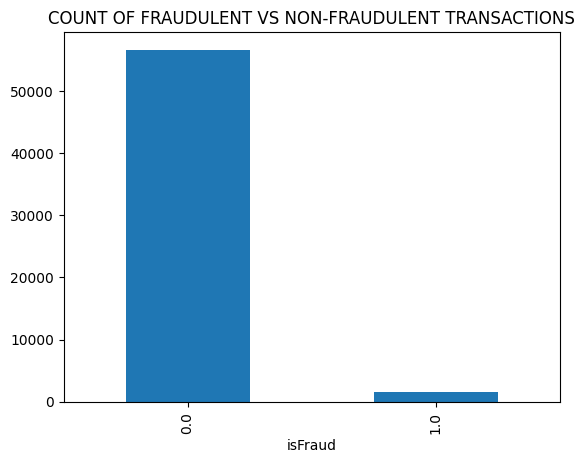

In [39]:
pd.Series(Y).value_counts().plot(kind='bar',title='COUNT OF FRAUDULENT VS NON-FRAUDULENT TRANSACTIONS', xlabel='isFraud')


#### MODEL SELECTION

#### Model1: LOGISTIC REGRESSION

In [40]:
#Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_score
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [41]:
#Predicting on Train data
predt_log = classifier.predict(x_train)
#Accuracy on Train data
print("Train data Accuracy is:", np.mean(predt_log==y_train))

Train data Accuracy is: 0.9855215672796013


In [42]:
#Predicting on test data
preds1 = classifier.predict(x_test)
#Accuracy on Test data
print("Test data Accuracy is:", np.mean(preds1==y_test))

Test data Accuracy is: 0.9855645299879704


In [43]:
# Evaluating model
CM_log = confusion_matrix(y_test,preds1)
CM_log

array([[11314,    15],
       [  153,   156]])

In [44]:
CR_log=classification_report(preds1,y_test)
print(CR_log)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     11467
         1.0       0.50      0.91      0.65       171

    accuracy                           0.99     11638
   macro avg       0.75      0.95      0.82     11638
weighted avg       0.99      0.99      0.99     11638



#### Model 2: Decision Tree

In [45]:
#Importing packages
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#Train Model
DT = DecisionTreeClassifier()
model1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=10)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

No. Of Leaves: 64


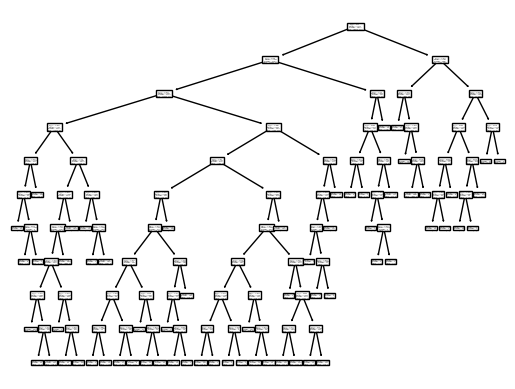

In [46]:
#PLot the Decision Tree
tree.plot_tree(model1);
print("No. Of Leaves:",model1.get_n_leaves())

In [47]:
#Predicting on test data
preds2= model1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(preds2==y_test))

Test data Accuracy is: 0.9984533424987111


In [48]:
# Evaluating model
CM_2 = confusion_matrix(y_test,preds2)
CM_2

array([[11322,     7],
       [   11,   298]])

In [49]:
CR_2=classification_report(preds2,y_test)
print(CR_2)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11333
         1.0       0.96      0.98      0.97       305

    accuracy                           1.00     11638
   macro avg       0.98      0.99      0.98     11638
weighted avg       1.00      1.00      1.00     11638



#### Model 3: Random Forest

In [50]:
# Random Forest Classification

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [51]:
# Train model
parametersRF = {'n_estimators':15,'class_weight': "balanced",'n_jobs':-1,'random_state':42}
RF = RandomForestClassifier(**parametersRF)
model_3 = RF.fit(x_train, y_train)

# Predict on testing set
preds_3 = RF.predict(x_test)


fprRF, recallRF, thresholdsRF = roc_curve(y_test, preds_3)
AUC_rf = auc(fprRF, recallRF)

resultsRF = {"Area Under Curve":AUC_rf}

# showing results from Random Forest

for measure in resultsRF:
    print(measure,": \n",resultsRF[measure])

Area Under Curve : 
 0.9804942552277984


In [52]:
# Evaluating model
CM_3 = confusion_matrix(y_test,preds_3)
CM_3

array([[11327,     2],
       [   12,   297]])

In [53]:
CR_3=classification_report(y_test,preds_3)
print(CR_3)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11329
         1.0       0.99      0.96      0.98       309

    accuracy                           1.00     11638
   macro avg       1.00      0.98      0.99     11638
weighted avg       1.00      1.00      1.00     11638



#### Comparing the models: UnBalanced data

In [55]:
print("Accuracy of Logistic Regression:",np.mean(preds1==y_test))
print("Accuracy of Decision Tree:",np.mean(preds2==y_test))
print("Accuracy of Random Forest:",AUC_rf)

Accuracy of Logistic Regression: 0.9855645299879704
Accuracy of Decision Tree: 0.9984533424987111
Accuracy of Random Forest: 0.9804942552277984


#### Handling Imbalanced Data

In [57]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(X,Y)
print("Resampled shape of X: ", x_resampled.shape)
print("Resampled shape of Y: ", y_resampled.shape)
value_counts = Counter(y_resampled)
print(value_counts)
train_x,test_x, train_y,test_y = train_test_split(x_resampled,y_resampled, test_size=0.3, random_state=42)

Resampled shape of X:  (113296, 10)
Resampled shape of Y:  (113296,)
Counter({0.0: 56648, 1.0: 56648})


In [58]:
print("Shape of resampled x_train:", train_x.shape)
print("Shape of resampled x_test:", test_x.shape)
print("Shape of resampled y_train:", train_y.shape)
print("Shape of resampled y_test:", test_y.shape)

Shape of resampled x_train: (79307, 10)
Shape of resampled x_test: (33989, 10)
Shape of resampled y_train: (79307,)
Shape of resampled y_test: (33989,)


In [59]:
#Value Counts of ISFRAUD columns after resampling
print("resample y train counts:\n",train_y.value_counts())
print("resample y test counts:\n",test_y.value_counts())

resample y train counts:
 isFraud
1.0    39782
0.0    39525
Name: count, dtype: int64
resample y test counts:
 isFraud
0.0    17123
1.0    16866
Name: count, dtype: int64


<Axes: title={'center': 'CLASS DISTRIBUTION AFTER APPLYING OVERSAMPLING'}, xlabel='isFraud'>

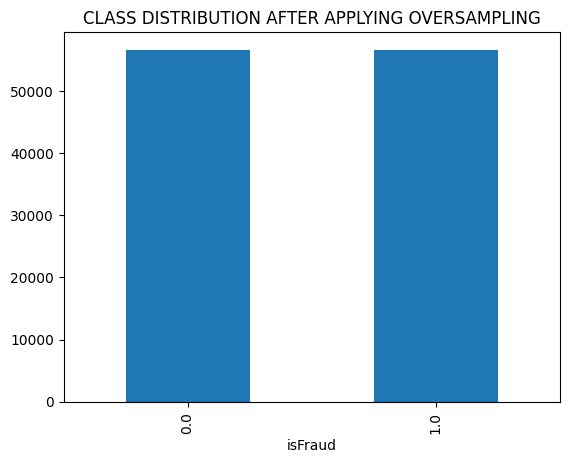

In [60]:
pd.Series(y_resampled).value_counts().plot(kind='bar',title='CLASS DISTRIBUTION AFTER APPLYING OVERSAMPLING', xlabel='isFraud')


#### Model : Logistic Regression

In [61]:
#Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [62]:
classifier=LogisticRegression()
classifier.fit(train_x,train_y)

LogisticRegression()

In [63]:
#Predicting on Train data
predt_log = classifier.predict(train_x)
#Accuracy on Train data
print("Train data Accuracy is:", np.mean(predt_log==train_y))

Train data Accuracy is: 0.94870566280404


In [64]:
#Predicting on test data
preds_log = classifier.predict(test_x)
#Accuracy on Test data
print("Test data Accuracy is:", np.mean(preds_log==test_y))

Test data Accuracy is: 0.9500132395775104


In [65]:
# Evaluating model
CM_log = confusion_matrix(test_y,preds_log)
CM_log

array([[16051,  1072],
       [  627, 16239]])

In [66]:
CR_log=classification_report(preds_log,test_y)
print(CR_log)

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     16678
         1.0       0.96      0.94      0.95     17311

    accuracy                           0.95     33989
   macro avg       0.95      0.95      0.95     33989
weighted avg       0.95      0.95      0.95     33989



#### Model : Decision Tree

In [67]:
#Train Model
DT = DecisionTreeClassifier()
model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
model_dt.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

No. Of Leaves: 89


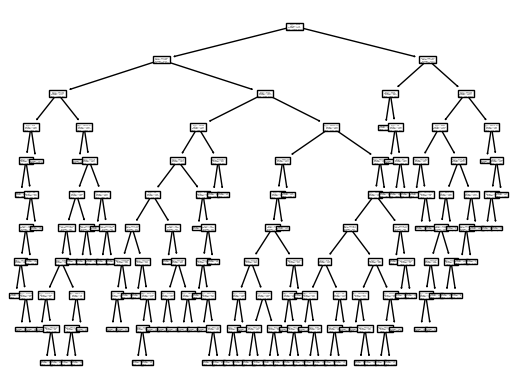

In [68]:
#Plot the Decision Tree
tree.plot_tree(model_dt);
print("No. Of Leaves:",model_dt.get_n_leaves())

In [69]:
#Predicting on test data
preds_dt = model_dt.predict(test_x)
#Accuracy on Test data
print("Test data Accuracy is:", np.mean(preds_dt==test_y))

Test data Accuracy is: 0.998528935832181


In [70]:
# Evaluating model
CM_dt = confusion_matrix(test_y,preds_dt)
CM_dt

array([[17073,    50],
       [    0, 16866]])

In [71]:
CR_dt=classification_report(preds_dt,test_y)
print(CR_dt)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17073
         1.0       1.00      1.00      1.00     16916

    accuracy                           1.00     33989
   macro avg       1.00      1.00      1.00     33989
weighted avg       1.00      1.00      1.00     33989



#### Model : Random Forest

In [72]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [73]:
# Train model
parametersRF = {'n_estimators':15,'class_weight': "balanced",'n_jobs':-1,'random_state':42}
RF = RandomForestClassifier(**parametersRF)
model_rf= RF.fit(train_x, train_y)

# Predict on testing set
preds_rf = RF.predict(test_x)


fprRF, recallRF, thresholdsRF = roc_curve(test_y, preds_rf)
AUC_RF = auc(fprRF, recallRF)

resultsRF = {"Area Under Curve":AUC_RF}

# showing results from Random Forest

for measure in resultsRF:
    print(measure,": \n",resultsRF[measure])

Area Under Curve : 
 0.999883198037727


In [74]:
# Evaluating model
CM_rf = confusion_matrix(test_y,preds_rf)
CM_rf

array([[17119,     4],
       [    0, 16866]])

In [75]:
CR_rf=classification_report(preds_rf,test_y)
print(CR_rf)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17119
         1.0       1.00      1.00      1.00     16870

    accuracy                           1.00     33989
   macro avg       1.00      1.00      1.00     33989
weighted avg       1.00      1.00      1.00     33989



#### Comparing the models: Balanced data

In [76]:
print("Accuracy of Logistic Regression:",np.mean(preds_log==test_y))
print("Accuracy of Decision Tree:",np.mean(preds_dt==test_y))
print("Accuracy of Random Forest:",AUC_RF)

Accuracy of Logistic Regression: 0.9500132395775104
Accuracy of Decision Tree: 0.998528935832181
Accuracy of Random Forest: 0.999883198037727


#### From above Accuracy Comparision, We got good accuracy in all Algorithms except Logistic Regression.

#### As RANDOM FOREST accuracy is very close to 100% however we finalised random forest as our Final Model.

#### Accuracy of Random Forest: 0.9998623348017621

True negatives:  18155

False positives:  5

False negatives:  0

True Positives:  17840

### Final Model with Random Forest Classifier

In [77]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve


RandomForest_Deploy = RandomForestClassifier(class_weight = 'balanced',
                                       max_depth = 7,
                                       max_features = 4,
                                       min_samples_split = 2,
                                       n_estimators = 50,
                                       random_state = 42).fit(train_x,train_y)

y_pred = RandomForest_Deploy.predict(test_x)
y_train_pred = RandomForest_Deploy.predict(train_x)

RandomForest_Deploy_f1 = f1_score(test_y, y_pred)
RandomForest_Deploy_acc = accuracy_score(test_y, y_pred)
RandomForest_Deploy_recall = recall_score(test_y, y_pred)
RandomForest_Deploy_auc = roc_auc_score(test_y, y_pred)
RandomForest_Deploy_pre = precision_score(test_y, y_pred)
precision, recall, _ = precision_recall_curve(test_y, y_pred)
RandomForest_Deploy_recall_auc = auc(recall, precision)

print("RandomForest_Deploy")
print ("------------------")
eval("RandomForest_Deploy, train_x, test_x")

RandomForest_Deploy
------------------


(RandomForestClassifier(class_weight='balanced', max_depth=7, max_features=4,
                        n_estimators=50, random_state=42),
         type      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
 69097      1   155761.29      155761.29            0.00       192775.45   
 34706      1   213682.15           0.00            0.00      1968940.99   
 30228      1    31519.66           0.00            0.00        53487.41   
 60453      4   212130.67      212130.67            0.00            0.00   
 78432      4   146681.74      146681.74            0.00            0.00   
 ...      ...         ...            ...             ...             ...   
 76820      4    39013.30       39013.30            0.00            0.00   
 110268     1    18126.95       18126.95            0.00            0.00   
 103694     1  1448630.38     1448630.38            0.00      1294571.45   
 860        4   595846.21      118425.71            0.00        46257.07   
 15795      3     6737.87  

In [78]:
train_x.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,origin_bal_change,dest_bal_increase,HourOfDay
69097,1,155761.29,155761.29,0.0,192775.45,348536.74,0.0,155761.29,155761.29,1.875000
34706,1,213682.15,0.00,0.0,1968940.99,2182623.14,0.0,0.00,213682.15,0.375000
30228,1,31519.66,0.00,0.0,53487.41,85007.07,0.0,0.00,31519.66,0.333333
60453,4,212130.67,212130.67,0.0,0.00,0.00,0.0,212130.67,0.00,5.541667
78432,4,146681.74,146681.74,0.0,0.00,0.00,0.0,146681.74,0.00,4.208333


In [79]:
test_x.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,origin_bal_change,dest_bal_increase,HourOfDay
19356,3,7353.24,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.291667
8768,4,2388561.97,9098.00,0.00,0.00,2482850.83,0.0,9098.00,2482850.83,0.416667
29762,1,14434.99,155195.61,140760.62,509153.86,523588.86,0.0,14434.99,14435.00,0.333333
41479,2,1695.35,9046.00,7350.65,665100.43,666795.77,0.0,1695.35,1695.34,1.666667
67769,1,438224.60,438224.60,0.00,320697.46,758922.05,0.0,438224.60,438224.59,2.250000


In [83]:
import pickle
# open a file, where you ant to store the data
# dump information to that file
pickle.dump(RandomForest_Deploy, open('random_forest_model.pkl', 'wb'))

In [84]:
from pickle import dump
from pickle import load

In [85]:
pickle.model = pickle.load(open('random_forest_model.pkl', 'rb'))

In [140]:
test_y.head(50)

61523     1.0
98358     1.0
30853     0.0
14486     0.0
53677     0.0
48189     0.0
103523    1.0
49654     0.0
39778     0.0
72646     1.0
45776     0.0
40493     0.0
57015     1.0
46204     0.0
62889     1.0
91389     1.0
47912     0.0
53261     0.0
17749     0.0
92788     1.0
39394     0.0
53174     0.0
51064     0.0
95160     1.0
28010     0.0
27646     0.0
86391     1.0
8592      0.0
53572     0.0
67407     1.0
98522     1.0
20900     0.0
23170     0.0
94200     1.0
12080     0.0
34330     0.0
106529    1.0
68465     1.0
24323     0.0
62800     1.0
97178     1.0
52507     0.0
1315      0.0
92560     1.0
86578     1.0
32226     0.0
12435     0.0
4643      0.0
45523     0.0
87713     1.0
Name: isFraud, dtype: float64

In [141]:
test_y.value_counts()

isFraud
0.0    16540
1.0    16232
Name: count, dtype: int64

In [142]:
train_y.value_counts()

isFraud
1.0    38387
0.0    38079
Name: count, dtype: int64